# DSitW Assignment 2
### Clean data and predict precipitation in Brazil
#### Jonathan Hirko

## Import and explore data

In [200]:
#import the csv data into a data frame for exploration
import pandas as pd

##To test on your own system, change the path below to the location of your data set

path = '/Users/jonathan/Desktop/DSW_Data/asmt2_data.csv'
initial_df = pd.read_csv(path)

In [201]:
#Get a sense of the data
initial_df.head()

,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,0,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,...,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,1,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,...,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,2,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,...,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,3,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,...,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,4,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,...,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


In [202]:
#explore data types
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 32 columns):
Unnamed: 0    165000 non-null int64
wsid          165000 non-null int64
wsnm          165000 non-null object
elvt          165000 non-null int64
lat           165000 non-null float64
lon           165000 non-null float64
inme          165000 non-null object
city          165000 non-null object
prov          165000 non-null object
mdct          165000 non-null object
date          165000 non-null object
yr            165000 non-null int64
mo            165000 non-null int64
da            165000 non-null int64
hr            165000 non-null int64
prcp          20932 non-null float64
stp           165000 non-null float64
smax          165000 non-null float64
smin          165000 non-null float64
gbrd          95944 non-null float64
temp          165000 non-null float64
dewp          165000 non-null float64
tmax          165000 non-null float64
dmax          165000 non-null float64

In [203]:
#Look for NaNs
initial_df.isna().sum()/165000

Unnamed: 0    0.000000
wsid          0.000000
wsnm          0.000000
elvt          0.000000
lat           0.000000
lon           0.000000
inme          0.000000
city          0.000000
prov          0.000000
mdct          0.000000
date          0.000000
yr            0.000000
mo            0.000000
da            0.000000
hr            0.000000
prcp          0.873139
stp           0.000000
smax          0.000000
smin          0.000000
gbrd          0.418521
temp          0.000000
dewp          0.000000
tmax          0.000000
dmax          0.000000
tmin          0.000000
dmin          0.000000
hmdy          0.000000
hmax          0.000000
hmin          0.000000
wdsp          0.061412
wdct          0.000000
gust          0.015188
dtype: float64

#### Note that ~87% of precipitation and ~42% of solar radiation fields are nan. Prcp will be the primary issue

In [204]:
#Get available cities
initial_df['city'].unique()

array(['São Gonçalo', 'Vitória'], dtype=object)

In [205]:
#compare the data available for each city
initial_df[initial_df['city']=='Vitória'].describe()

,Unnamed: 0,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,86952.00000,86952.0,86952.0,8.695200e+04,8.695200e+04,86952.000000,86952.000000,86952.000000,86952.000000,8103.000000,...,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000,86952.000000
mean,121523.50000,303.0,9.0,-2.027109e+01,-4.030607e+01,2011.292023,6.493514,15.733370,11.500000,1.790102,...,24.520054,19.712706,23.486470,18.823855,75.508660,77.987913,72.890986,1.870035,183.183711,5.143639
std,25101.02464,0.0,0.0,1.983136e-11,4.690320e-11,2.877640,3.448533,8.802078,6.922226,3.778580,...,4.675080,3.221859,4.389022,3.262563,16.944175,16.152887,17.638974,1.116863,124.045773,2.730668
min,78048.00000,303.0,9.0,-2.027109e+01,-4.030607e+01,2006.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99785.75000,303.0,9.0,-2.027109e+01,-4.030607e+01,2009.000000,4.000000,8.000000,5.750000,0.200000,...,22.100000,18.300000,21.300000,17.300000,65.000000,68.000000,61.000000,1.000000,50.000000,2.800000
50%,121523.50000,303.0,9.0,-2.027109e+01,-4.030607e+01,2011.000000,6.000000,16.000000,11.500000,0.400000,...,24.600000,20.300000,23.600000,19.300000,78.000000,80.000000,75.000000,1.700000,188.000000,5.000000
75%,143261.25000,303.0,9.0,-2.027109e+01,-4.030607e+01,2014.000000,9.000000,23.000000,17.250000,1.800000,...,27.300000,21.800000,26.100000,21.000000,90.000000,92.000000,88.000000,2.600000,310.000000,7.100000
max,164999.00000,303.0,9.0,-2.027109e+01,-4.030607e+01,2016.000000,12.000000,31.000000,23.000000,70.200000,...,38.700000,26.900000,36.700000,25.700000,100.000000,100.000000,100.000000,19.100000,360.000000,22.700000


In [206]:
initial_df[initial_df['city']=='Vitória'].isna().sum()/86952

Unnamed: 0    0.000000
wsid          0.000000
wsnm          0.000000
elvt          0.000000
lat           0.000000
lon           0.000000
inme          0.000000
city          0.000000
prov          0.000000
mdct          0.000000
date          0.000000
yr            0.000000
mo            0.000000
da            0.000000
hr            0.000000
prcp          0.906811
stp           0.000000
smax          0.000000
smin          0.000000
gbrd          0.420186
temp          0.000000
dewp          0.000000
tmax          0.000000
dmax          0.000000
tmin          0.000000
dmin          0.000000
hmdy          0.000000
hmax          0.000000
hmin          0.000000
wdsp          0.000000
wdct          0.000000
gust          0.000000
dtype: float64

In [207]:
initial_df[initial_df['city']=='São Gonçalo'].describe()

,Unnamed: 0,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,78048.000000,78048.0,78048.0,7.804800e+04,7.804800e+04,78048.000000,78048.000000,78048.000000,78048.000000,12829.000000,...,78048.000000,78048.000000,78048.000000,78048.000000,78048.000000,78048.000000,78048.000000,67915.000000,78048.000000,75542.000000
mean,39023.500000,178.0,237.0,-6.835777e+00,-3.831158e+01,2011.800738,6.481857,15.749692,11.500000,0.480131,...,24.248878,15.977461,22.803795,14.778907,51.916539,55.191651,48.456194,1.633900,110.233177,4.323069
std,22530.661242,0.0,0.0,7.753847e-13,6.713961e-11,2.585033,3.446678,8.792424,6.922231,2.653633,...,10.500904,7.208224,9.896572,6.861464,28.306442,29.228312,27.265632,1.236523,71.847998,2.886458
min,0.000000,178.0,237.0,-6.835777e+00,-3.831158e+01,2007.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19511.750000,178.0,237.0,-6.835777e+00,-3.831158e+01,2010.000000,3.750000,8.000000,5.750000,0.000000,...,23.500000,14.600000,22.300000,12.900000,34.000000,38.000000,31.000000,0.500000,74.000000,2.000000
50%,39023.500000,178.0,237.0,-6.835777e+00,-3.831158e+01,2012.000000,6.000000,16.000000,11.500000,0.000000,...,26.800000,18.200000,25.200000,16.800000,56.000000,60.000000,51.000000,1.600000,108.000000,4.400000
75%,58535.250000,178.0,237.0,-6.835777e+00,-3.831158e+01,2014.000000,9.000000,23.000000,17.250000,0.000000,...,30.900000,20.900000,28.800000,19.600000,74.000000,79.000000,69.000000,2.500000,144.000000,6.500000
max,78047.000000,178.0,237.0,-6.835777e+00,-3.831158e+01,2016.000000,12.000000,31.000000,23.000000,68.600000,...,39.300000,30.900000,38.000000,29.100000,100.000000,100.000000,100.000000,9.200000,360.000000,21.700000


In [208]:
initial_df[initial_df['city']=='São Gonçalo'].isna().sum()

Unnamed: 0        0
wsid              0
wsnm              0
elvt              0
lat               0
lon               0
inme              0
city              0
prov              0
mdct              0
date              0
yr                0
mo                0
da                0
hr                0
prcp          65219
stp               0
smax              0
smin              0
gbrd          32520
temp              0
dewp              0
tmax              0
dmax              0
tmin              0
dmin              0
hmdy              0
hmax              0
hmin              0
wdsp          10133
wdct              0
gust           2506
dtype: int64

#### I will user Sao Goncalo for this analysis. Although Sao Goncalo has ~9000 fewer records, it has a higher % of prcp and gbrd

In [209]:
#Create the Sao Goncalo df to use for the remaining analysis
sg_df= initial_df[initial_df['city']=='São Gonçalo']
sg_df.head()

,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,0,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,...,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,1,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,...,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,2,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,...,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,3,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,...,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,4,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,...,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


In [210]:
#examine how many gbrd fields are zero
(sg_df['gbrd'] == 0).astype(int).sum(axis=0)/78048

0.10156570315703158

In [211]:
#examine how many prcp fields are zero
(sg_df['prcp'] == 0).astype(int).sum(axis=0)/78048

0.1384788847888479

## Adjust "gbrd" field 
#### "For solar radiation (gbrd) column, while almost half of the entries are missing, common sense suggests that all the missing entries happen after sunset, when there is no sun at all (thus zero solar radiation). Thus in this scenario, imputation by constant values (0) is appropriate."

In [212]:
#fill Nans in gbrd field with zeros
sg_df['gbrd'].fillna(0, inplace=True)

#confirm that fill worked
sg_df.isna().sum()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Unnamed: 0        0
wsid              0
wsnm              0
elvt              0
lat               0
lon               0
inme              0
city              0
prov              0
mdct              0
date              0
yr                0
mo                0
da                0
hr                0
prcp          65219
stp               0
smax              0
smin              0
gbrd              0
temp              0
dewp              0
tmax              0
dmax              0
tmin              0
dmin              0
hmdy              0
hmax              0
hmin              0
wdsp          10133
wdct              0
gust           2506
dtype: int64

## Look at and clean other fields

In [213]:
#create new df with fields that have no nans (wdsp, gust, prcp)
df = sg_df[(sg_df['wdsp'].isna()==False) & (sg_df['gust'].isna()==False) & (sg_df['prcp'].isna()==False)]
df
#confirm that filtering worked
len(df)
df.isna().sum()

Unnamed: 0    0
wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
mdct          0
date          0
yr            0
mo            0
da            0
hr            0
prcp          0
stp           0
smax          0
smin          0
gbrd          0
temp          0
dewp          0
tmax          0
dmax          0
tmin          0
dmin          0
hmdy          0
hmax          0
hmin          0
wdsp          0
wdct          0
gust          0
dtype: int64

count    12426.000000
mean         0.447288
std          2.647981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         68.600000
Name: prcp, dtype: float64

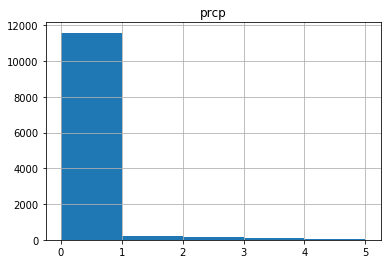

In [214]:
#Evaluate air pressue, stpAir pressure for the hour in hPa to tenths (instant)
df.hist(column ='prcp', bins=range(0,6))
df['prcp'].describe()

count    12426.000000
mean       128.504136
std        331.902498
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        991.800000
Name: stp, dtype: float64

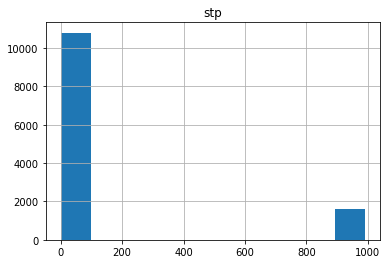

In [215]:
#Evaluate air pressue, stpAir pressure for the hour in hPa to tenths (instant)
df.hist(column ='stp')
df['stp'].describe()

count    12426.000000
mean        27.112475
std        218.956602
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3741.616000
Name: gbrd, dtype: float64

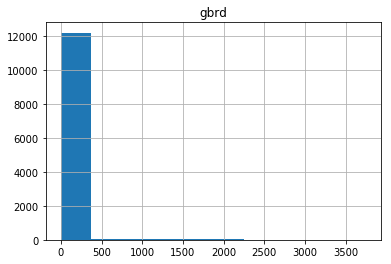

In [216]:
#Evaluate gbrdSolar radiation KJ/m2
df.hist(column ='gbrd')
df['gbrd'].describe()

count    12426.000000
mean         3.084388
std          7.995180
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.300000
Name: temp, dtype: float64

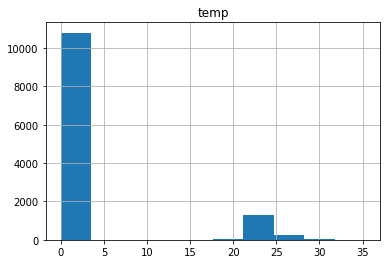

In [217]:
#Eval Temp
df.hist(column ='temp')
df['temp'].describe()

count    12426.000000
mean         2.747706
std          7.174189
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.400000
Name: dewp, dtype: float64

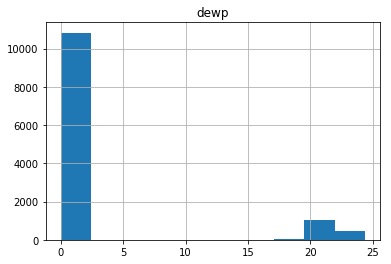

In [218]:
#Eval dewpoint
df.hist(column ='dewp')
df['dewp'].describe()

count    12426.000000
mean        11.283921
std         29.614799
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: hmdy, dtype: float64

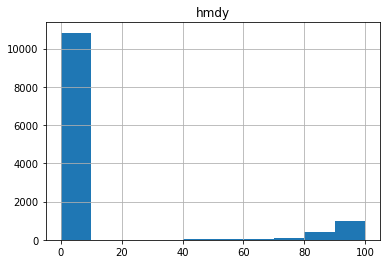

In [219]:
#Eval humidity
df.hist(column ='hmdy')
df['hmdy'].describe()

count    12426.000000
mean         0.195220
std          0.672271
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: wdsp, dtype: float64

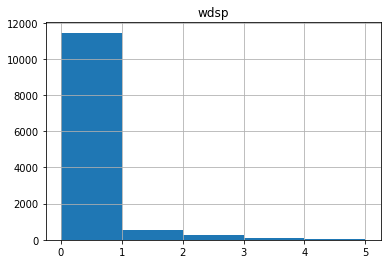

In [220]:
#Eval wind speed
df.hist(column ='wdsp', bins=range(0,6))
df['wdsp'].describe()

count    12426.000000
mean         0.722252
std          2.172636
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.700000
Name: gust, dtype: float64

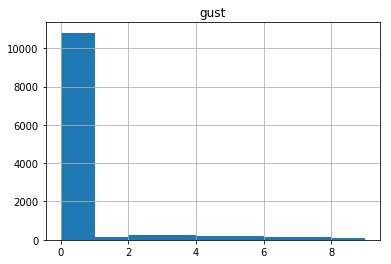

In [221]:
#Eval gust
df.hist(column ='gust', bins=range(0,10))
df['gust'].describe()

### Remove outliers

In [222]:

#df.drop(['wsnm', 'inme', 'city','prov','mdct', 'date'], axis=1, inplace=True)

In [223]:
from scipy import stats
import numpy as np
df_o = df[(np.abs(stats.zscore(df['stp'])) < 3)]
#sg_df[(sg_df['wdsp'].isna()==False)
#z = np.abs(stats.zscore(df['stp']))
#df= df[(z < 3).all(axis=0)]

#df_o.hist(column ='stp')
#df_o['stp'].describe()




